Nama : .....   
Batch : ......  
Objective : .....

# **Latihan Buddy Session**

> Dilarang dibuka saat livecode. Kalian boleh membuka jawaban latihan tapi bukan kunci jawaban instruktur.

## Objective
- Student dapat mengakses dataset pada bigquery
- Student dapat menggunakan panda pada colab dengan file ipynb
- Student dapat menjelaskan data dengan narasi yang mudah dipahami orang awam
- Student dapat menjelas deskriptif statiska data yang didapat dan memberikan insight sebagai data analyst.
- Student dapat membuat REST API sederhana dengan FASTAPI gunakan file py dan file csv.

> ***BUATLAH DOKUMENTASI PENGERJAAN YANG JELAS, DAPAT DI PAHAMI DAN RAPI.***

# **Exercise**
Menggunakan dataset bigquery berikut `bigquery-public-data.baseball.games_wide`

> Ingat ini latihan tapi harus latih kebiasaan membuat narasi penjelasan kode yang dibuat ataupun analisa yang dibuat untuk apa, jangan lupa selalu berikan nama dan batch diawal file.


## **Latihan Pandas**
Kerjakan dengan file `ipynb`.
1. Tampilkan data pada tableschedules yaitu column duration.
2. Lakukan data cleaning dan simpan di data.csv terhadap data duration.


In [1]:
# Import panda dan setup project id disini

import pandas as pd
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

client = bigquery.Client('ayusudi-e52a2')

Authenticated


1. Tampilkan data pada tableschedules yaitu column duration.

In [5]:
sql = "SELECT * FROM `bigquery-public-data.baseball.games_wide` LIMIT 1500"
df = client.query(sql).to_dataframe()
data = df["duration"]
data

0       6:13
1       6:13
2       6:13
3       6:13
4       6:13
        ... 
1495    2:48
1496    2:48
1497    2:48
1498    2:48
1499    2:48
Name: duration, Length: 1500, dtype: object

2. Lakukan data cleaning dan simpan di data.csv terhadap data duration

Data cleaning yang dilakukan mengubah string duration menjadi number menggunakan function minuteStrToNumber dan menghilangkan missing data.

In [21]:
def minuteStrToNumber(str):
  result = 0
  if ':' in str :
    list = str.split(":")
    minute = int(list[0]) * 60
    seconds = int(list[1])
    result = minute + seconds
  elif len(str) > 0:
    result = int(str)
  return result

dataBaru = map(minuteStrToNumber, df['duration'])
dataResult = pd.DataFrame({
    "duration" : dataBaru
})

dataResult.to_csv("data.csv", index=False)


## **Latihan Statistika**
Kerjakan dengan file `ipynb`.
1. Lakukan perhitungan mean, median, dan modus terhadap data duration.
2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range) terhadap data duration.


1. Lakukan perhitungan mean, median, dan modus terhadap data duration.



In [29]:
print(f"Rata-rata duration : {dataResult['duration'].mean()}")
print(f"Median duration : {dataResult['duration'].median()}")
print(f"Modues duration : {dataResult['duration'].mode()[0]}")

Rata-rata duration : 220.01666666666668
Median duration : 199.0
Modues duration : 373


2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range) terhadap data duration.



In [38]:

max = dataResult['duration'].max()
min = dataResult['duration'].min()
std = "{:.2f}".format(dataResult["duration"].std())
variance = "{:.2f}".format(dataResult["duration"].var())

print(f"Standar deviasi : {std}")
print(f"Variance : {variance}")
print(f"Range duration : {max- min}")


Standar deviasi : 82.53
Variance : 6811.35
Range duration : 240


Tampilkan skewnessnya

Skewness : 1.1423560439233134


<Axes: >

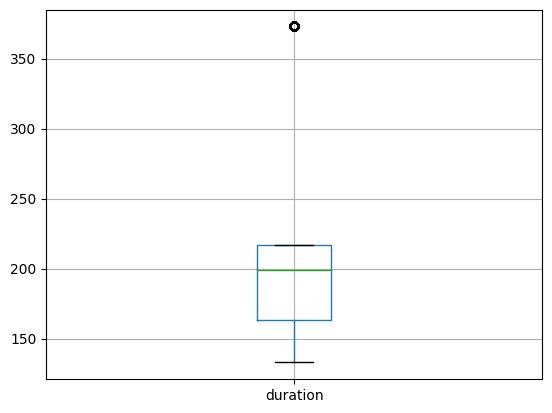

In [41]:
skew = dataResult["duration"].skew()
print(f"Skewness : {skew}")
dataResult.boxplot(column='duration')

Skewnessnya > 1 maka skewness ini adalah highly skewed.


## **Latihan REST API**
Kerjakan pada file `py`. Buatkan REST API dengan method GET untuk menampilkan data pada file csv yang dikerjakan sebelumnya pada `Latihan Pandas`.
- `GET /` akan menampilkan list of directory dari `data.csv`
